# Analysing well logs with Python Tool Pro

With the existing Python Tool, scripts are written and run from an embedded editor in the Python Tool. In contrast, Python Tool Pro offers an API which is meant to be used in the end user's scripts run in a process separated from Petrel. It may even run on another computer. The end user will use the API of the Python Tool Pro in a Jupyter Notebook, an IPython shell, or on any platform capable of running Python scripts.

This example uses Petrel project PythonToolTestProject.

## Install packages
This Notebook uses the following packages

- matplotlib
- scikit-learn
- ipywidgets

Verify that these packages are installed in your environment. If not you may uncomment the lines in the cell below and run it.
Close the Notebook and open it again after installing the packages.

In [ ]:
# Uncomment to list installed packages
#%conda list

# Uncomment to install packages
#%pip install matplotlib
#%pip install scikit-learn
#%pip install ipywidgets

## Connect to Petrel
This Jupyter Notebook is a client which connects to the Python Tool Pro server. The computer name on which Petrel with Python Tool Pro server runs, and a port number must be given as shown below.

In [1]:
from blueback.pythontool.grpc.petrelconnection import PetrelConnection
petrel = PetrelConnection(port=40129, host='localhost')
petrel.open()

print(f'Currently open Petrel project is {petrel.get_current_project_name()}')

Currently open Petrel project is PetrelDemoProject.pet


### Find a well and its logs
In Python Tool Pro Api there is a group of functions to browse the currently opened Petrel project. Below is the wells function used to show the guid and the path of all wells in the project. You can list the domain objects of each supported type in the same way

In [2]:
petrel.well_logs

WellLogs({'Input/Wells/Wells/Thom/Well logs/other logs/Combined': [WellLog(petrel_name="Combined"), WellLog(petrel_name="Combined")], 'Input/Wells/Wells/Egwene/Well logs/BBR_PHIE': WellLog(petrel_name="BBR_PHIE"), 'Input/Wells/Wells/Faile/Well logs/PERM_calc': WellLog(petrel_name="PERM_calc"), 'Input/Wells/Wells/Elayne/Well logs/PERM_calc': WellLog(petrel_name="PERM_calc"), 'Input/Wells/Wells/Moraine/Well logs/other logs/Combined': [WellLog(petrel_name="Combined"), WellLog(petrel_name="Combined")], 'Input/Wells/Wells/Elayne/Well logs/Vp_fill': WellLog(petrel_name="Vp_fill"), 'Input/Wells/Wells/Tuon/Well logs/Vs _demo_rdp': WellLog(petrel_name="Vs _demo_rdp"), "Input/Wells/Wells/Nynaeve/Well logs/other logs/Poisson's ratio _demo_djs": WellLog(petrel_name="Poisson's ratio _demo_djs"), 'Input/Wells/Wells/Mat/Well logs/GI _demo_djs': WellLog(petrel_name="GI _demo_djs"), 'Input/Wells/Wells/Egwene/Well logs/other logs/Rho smoothed _demo_djs': WellLog(petrel_name="Rho smoothed _demo_djs"), 'I

Lets use an widget to select a well: 

In [3]:
import ipywidgets as widgets
well_names = sorted(list(petrel.wells.keys()))
well_name_widget = widgets.Dropdown(
    options=well_names,
    value=well_names[0],
    description='Select well:',
    disabled=False,
)
display(well_name_widget)

Dropdown(description='Select well:', options=('Input/Wells/Wells/Egwene', 'Input/Wells/Wells/Elayne', 'Input/W…

In [4]:
well = petrel.wells[well_name_widget.value]
logs = well.logs
print(', '.join([log.petrel_name for log in logs]))

BBR_VSH, BBR_SW, BBR_PERM, PERM_calc, Rho _demo_rdp, Vp_fill, SI _demo_djs, Vp/Vs _demo_djs, GI _demo_djs, Poisson's ratio _demo_djs, Combined, Vp smoothed _demo_djs, Vs smoothed _demo_djs, Rho smoothed _demo_djs, Combined, GRR, BBR_PHIE, Vp _demo_rdp, Vs _demo_rdp, One-way time 1, AI _demo_djs, Facies, Winner, Winner, Zone log linked to 'Received Kingdom Formation Tops'


In [5]:
from blueback.pythontool.welllog import WellLog
from blueback.pythontool.welllog import DiscreteWellLog

cont_logs = [log for log in well.logs if type(log) is WellLog]
discrete_logs = [log for log in well.logs if type(log) is DiscreteWellLog]

print(f'Number of continuous well logs is {len(cont_logs)}')
print(f'Number of discrete well logs is {len(discrete_logs)}')

Number of continuous well logs is 21
Number of discrete well logs is 4


## Utilizing the power of Pandas

In this section we perform some data science experiments to demonstrate a small part of the extremely large number of features in the Pandas, Matplotlib, Scipy and Scikit-learn libraries.

Both Python Tool Pro and in-process Python Tool allow users to extract all logs of a well, interpolated to the same depths, into a Pandas DataFrame. In contrast to the in-process Python Tool, the Python Tool Pro API is used in the development environment of the user. The user may investigate well log data without storing data to temporary file. The user may also write data back to Petrel.

### Getting all logs interpolated to the same depths in a Pandas DataFrame

In [6]:
logs_df = well.logs_dataframe(cont_logs)

# Sets MD as index
logs_df = logs_df.set_index('MD')
logs_df

,BBR_VSH,BBR_SW,BBR_PERM,PERM_calc,Rho _demo_rdp,Vp_fill,SI _demo_djs,Vp/Vs _demo_djs,GI _demo_djs,Poisson's ratio _demo_djs,...,Rho smoothed _demo_djs,Combined,GRR,BBR_PHIE,Vp _demo_rdp,Vs _demo_rdp,One-way time 1,AI _demo_djs,TWT,TVD
MD,,,,,,,,,,,,,,,,,,,,,
-342.999938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002929,-5500.010252
-342.499938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.069958,NaN,0.139916,-5499.510252
-341.999938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.141381,NaN,0.282761,-5499.010252
-341.499938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.212803,NaN,0.425606,-5498.510252
-340.999938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.284226,NaN,0.568451,-5498.010252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148.000062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,581.765999,NaN,1163.552682,990.989748
6148.500062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,581.796320,NaN,1163.608202,991.489748
6149.000062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,581.826649,NaN,1163.663723,991.989748


## Plotting logs
Lets start by using a widget to select some of the continous logs associated with the well we selected earlier.

In [7]:
from random import sample
log_names = [log.petrel_name for log in cont_logs]
w = widgets.SelectMultiple(
    options=log_names,
    value=sample(log_names, min(len(log_names)//2, 6)),
    rows=len(log_names),
    description='Select logs',
)

display(w)

SelectMultiple(description='Select logs', index=(10, 10, 0, 5, 7, 13), options=('BBR_VSH', 'BBR_SW', 'BBR_PERM…

Then plot our selection with matplotlib.

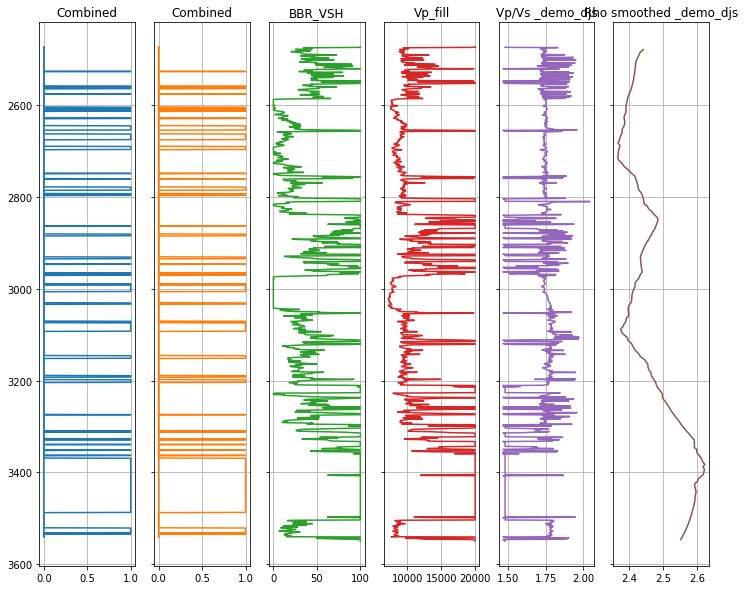

In [8]:
from matplotlib import pyplot as plt

log_types = w.value
n = len(log_types)
fig, ax = plt.subplots(1, n, figsize=(2*n, 10), sharey = True)

for i in range(n):
    lt = log_types[i]
    ax[i].plot(logs_df[lt], logs_df.index, color='C'+str(i))
    ax[i].set_title(lt)
    ax[i].grid()
    
plt.gca().invert_yaxis()

## Smoothing logs

Moving window gaussian filter on each variable in the DataFrame.

In [9]:
import pandas as pd
import scipy
smooth_logs_df = logs_df.rolling(80, win_type = 'gaussian', center = True).mean(std = 20)

Smoothed and original logs plotted together

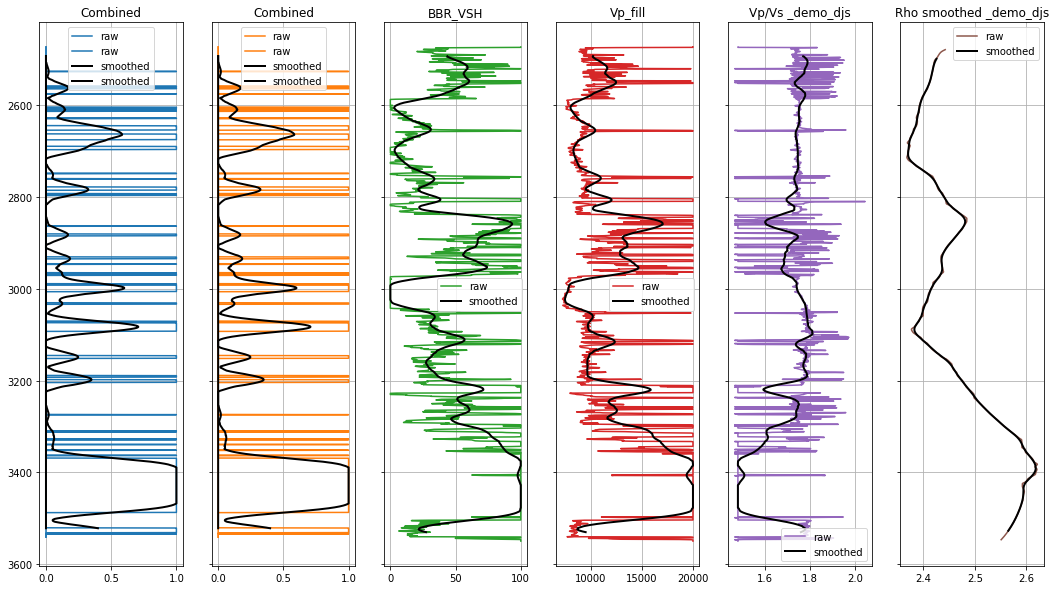

In [10]:
n = len(log_types)
fig, ax = plt.subplots(1, n, figsize=(3*n, 10), sharey = True)

for i in range(n):
    lt = log_types[i]
    ax[i].plot(logs_df[lt], logs_df.index, color='C'+str(i), label = 'raw')
    ax[i].plot(smooth_logs_df[lt], smooth_logs_df.index, color='k', linewidth = 2, label = 'smoothed')
    ax[i].set_title(lt)
    ax[i].grid()
    ax[i].legend()
    
plt.gca().invert_yaxis()

## Dimension reduction using Principal Component Analysis (PCA) with scikit-learn

In [ ]:
# Select some logs
# Set sample matrix X
X = smooth_logs_df[list(log_types)].dropna()
#inds = [(md > 6800 and md < 9700) for md in X.index]
#index = X.loc[inds].index.unique()
#X = X.loc[index].dropna()

n = len(log_types)
fig, ax = plt.subplots(1, n, figsize=(3*n, 10), sharey = True)

for i in range(n):
    lt = log_types[i]
    ax[i].plot(X[lt], X.index, color='C'+str(i), label = 'raw')
    ax[i].set_title(lt)
    ax[i].grid()
    ax[i].legend()
    
plt.gca().invert_yaxis()

### Calculating PCA scores

In [ ]:
# First install scikit-learn in Anaconda environment
# Uncomment the next line if you don't already have scikit-learn installed
#%pip install scikit-learn

from sklearn.decomposition import PCA

no_comps = 2
pca = PCA(n_components = no_comps, whiten=False, copy=True)

# Perform PCA. The method works on centered columns. No need to center first
scores = pca.fit_transform(X)
scores_df = pd.DataFrame(scores, index=X.index, columns=range(1, 1 + no_comps))
print(scores_df.shape)

### Reducing dimension

In [ ]:
logs_reduced = pca.inverse_transform(scores)
logs_reduced_df = pd.DataFrame(logs_reduced, columns = X.columns, index = X.index)

In [ ]:
n = len(log_types)
fig, ax = plt.subplots(1, n, figsize=(3*n, 10), sharey = True)

for i in range(n):
    lt = log_types[i]
    ax[i].plot(X[lt], X.index, color='C'+str(i), label = 'original')
    ax[i].plot(logs_reduced_df[lt], logs_reduced_df.index, color='k', linewidth = 1, label = 'reduced dimension')
    ax[i].set_title(lt)
    ax[i].grid()
    ax[i].legend()
    
plt.gca().invert_yaxis()